In [39]:
library(readxl)
library(tidyverse)

In [40]:
data <- read_excel("train.xlsx")

In [41]:
head(data)

Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,⋯,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
PID0x6418,2,Yes,No,Yes,No,4.760603,Richard,NA,Larre,⋯,NA,9.857562,NA,1,1,1,1,1,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
PID0x25d5,4,Yes,Yes,No,No,4.910669,Mike,NA,Brycen,⋯,Multiple,5.522560,normal,1,NA,1,1,0,NA,Cystic fibrosis
PID0x4a82,6,Yes,No,No,No,4.893297,Kimberly,NA,Nashon,⋯,Singular,NA,normal,0,1,1,1,1,Multifactorial genetic inheritance disorders,Diabetes
PID0x4ac8,12,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,⋯,Singular,7.919321,inconclusive,0,0,1,0,0,Mitochondrial genetic inheritance disorders,Leigh syndrome
PID0x1bf7,11,Yes,No,NA,Yes,4.720703,Johanna,Stutzman,Suave,⋯,Multiple,4.098210,NA,0,0,0,0,NA,Multifactorial genetic inheritance disorders,Cancer
PID0x44fe,14,Yes,No,Yes,No,5.103188,Richard,NA,Coleston,⋯,Multiple,10.272230,normal,1,0,0,1,0,Single-gene inheritance diseases,Cystic fibrosis


In [42]:
data$"Genes in mother's side"<-ifelse(data$"Genes in mother's side"=="Yes",1,0)
data$"Inherited from father"<-ifelse(data$"Inherited from father"=="Yes",1,0)
data$"Maternal gene"<-ifelse(data$"Maternal gene"=="Yes",1,0)
data$"Paternal gene"<-ifelse(data$"Paternal gene"=="Yes",1,0)
head(data)

Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,⋯,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
PID0x6418,2,1,0,1,0,4.760603,Richard,NA,Larre,⋯,NA,9.857562,NA,1,1,1,1,1,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
PID0x25d5,4,1,1,0,0,4.910669,Mike,NA,Brycen,⋯,Multiple,5.522560,normal,1,NA,1,1,0,NA,Cystic fibrosis
PID0x4a82,6,1,0,0,0,4.893297,Kimberly,NA,Nashon,⋯,Singular,NA,normal,0,1,1,1,1,Multifactorial genetic inheritance disorders,Diabetes
PID0x4ac8,12,1,0,1,0,4.705280,Jeffery,Hoelscher,Aayaan,⋯,Singular,7.919321,inconclusive,0,0,1,0,0,Mitochondrial genetic inheritance disorders,Leigh syndrome
PID0x1bf7,11,1,0,NA,1,4.720703,Johanna,Stutzman,Suave,⋯,Multiple,4.098210,NA,0,0,0,0,NA,Multifactorial genetic inheritance disorders,Cancer
PID0x44fe,14,1,0,1,0,5.103188,Richard,NA,Coleston,⋯,Multiple,10.272230,normal,1,0,0,1,0,Single-gene inheritance diseases,Cystic fibrosis


In [43]:
summary(data)

  Patient Id         Patient Age     Genes in mother's side
 Length:22083       Min.   : 0.000   Min.   :0.0000        
 Class :character   1st Qu.: 3.000   1st Qu.:0.0000        
 Mode  :character   Median : 7.000   Median :1.0000        
                    Mean   : 6.974   Mean   :0.5952        
                    3rd Qu.:11.000   3rd Qu.:1.0000        
                    Max.   :14.000   Max.   :1.0000        
                    NA's   :1427                           
 Inherited from father Maternal gene    Paternal gene    Blood cell count (mcL)
 Min.   :0.0000        Min.   :0.0000   Min.   :0.0000   Min.   :4.093         
 1st Qu.:0.0000        1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:4.763         
 Median :0.0000        Median :1.0000   Median :0.0000   Median :4.899         
 Mean   :0.3969        Mean   :0.5524   Mean   :0.4336   Mean   :4.899         
 3rd Qu.:1.0000        3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:5.034         
 Max.   :1.0000        Max.   :1.0000   

In [44]:
drop <- c("Patient Id","Genes in mother's side","Patient First Name","Family Name","Father's name","Institute Name","Location of Institute")
data = data[,!(names(data) %in% drop)]

In [45]:
head(data)

Patient Age,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,⋯,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
2,0,1,0,4.760603,NA,NA,Alive,Normal (30-60),Normal,⋯,NA,9.857562,NA,1,1,1,1,1,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
4,1,0,0,4.910669,NA,23,Deceased,Tachypnea,Normal,⋯,Multiple,5.522560,normal,1,NA,1,1,0,NA,Cystic fibrosis
6,0,0,0,4.893297,41,22,Alive,Normal (30-60),Tachycardia,⋯,Singular,NA,normal,0,1,1,1,1,Multifactorial genetic inheritance disorders,Diabetes
12,0,1,0,4.705280,21,NA,Deceased,Tachypnea,Normal,⋯,Singular,7.919321,inconclusive,0,0,1,0,0,Mitochondrial genetic inheritance disorders,Leigh syndrome
11,0,NA,1,4.720703,32,NA,Alive,Tachypnea,Tachycardia,⋯,Multiple,4.098210,NA,0,0,0,0,NA,Multifactorial genetic inheritance disorders,Cancer
14,0,1,0,5.103188,NA,NA,Deceased,NA,Normal,⋯,Multiple,10.272230,normal,1,0,0,1,0,Single-gene inheritance diseases,Cystic fibrosis


In [46]:
drop <- c("Test 1","Test 2","Test 3","Test 4","Test 5","Parental consent","Place of birth")
data = data[,!(names(data) %in% drop)]

In [47]:
head(data)
tail(data)

Patient Age,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,⋯,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
2,0,1,0,4.760603,NA,NA,Alive,Normal (30-60),Normal,⋯,NA,9.857562,NA,1,1,1,1,1,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
4,1,0,0,4.910669,NA,23,Deceased,Tachypnea,Normal,⋯,Multiple,5.522560,normal,1,NA,1,1,0,NA,Cystic fibrosis
6,0,0,0,4.893297,41,22,Alive,Normal (30-60),Tachycardia,⋯,Singular,NA,normal,0,1,1,1,1,Multifactorial genetic inheritance disorders,Diabetes
12,0,1,0,4.705280,21,NA,Deceased,Tachypnea,Normal,⋯,Singular,7.919321,inconclusive,0,0,1,0,0,Mitochondrial genetic inheritance disorders,Leigh syndrome
11,0,NA,1,4.720703,32,NA,Alive,Tachypnea,Tachycardia,⋯,Multiple,4.098210,NA,0,0,0,0,NA,Multifactorial genetic inheritance disorders,Cancer
14,0,1,0,5.103188,NA,NA,Deceased,NA,Normal,⋯,Multiple,10.272230,normal,1,0,0,1,0,Single-gene inheritance diseases,Cystic fibrosis


Patient Age,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,⋯,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
9,1,1,1,5.012599,47,NA,Deceased,NA,Normal,⋯,NA,12.000000,slightly abnormal,NA,1,0,0,0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,1,1,0,5.258298,35,64,Deceased,Normal (30-60),Tachycardia,⋯,Multiple,6.584811,inconclusive,0,0,1,0,0,Mitochondrial genetic inheritance disorders,Leigh syndrome
8,1,0,1,4.974220,NA,56,Alive,Normal (30-60),Normal,⋯,Multiple,7.041556,inconclusive,1,1,1,1,0,Multifactorial genetic inheritance disorders,Diabetes
8,0,1,0,5.186470,35,51,Deceased,Tachypnea,Normal,⋯,Singular,7.715464,normal,0,0,0,1,NA,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy
7,0,1,1,4.858543,19,NA,Alive,Tachypnea,Tachycardia,⋯,Multiple,8.437670,abnormal,1,1,1,0,0,NA,Leigh syndrome
11,0,0,0,4.738067,32,62,Deceased,Normal (30-60),Normal,⋯,Singular,11.188371,normal,1,0,1,1,1,Multifactorial genetic inheritance disorders,Diabetes


In [48]:
dim(data)

[1] 22083    31

In [49]:
sum(duplicated(data))

[1] 0

In [50]:
data <- subset(data, !is.na("Genetic Disorder") & !is.na("Disorder Subclass"))
dim(data)

[1] 22083    31

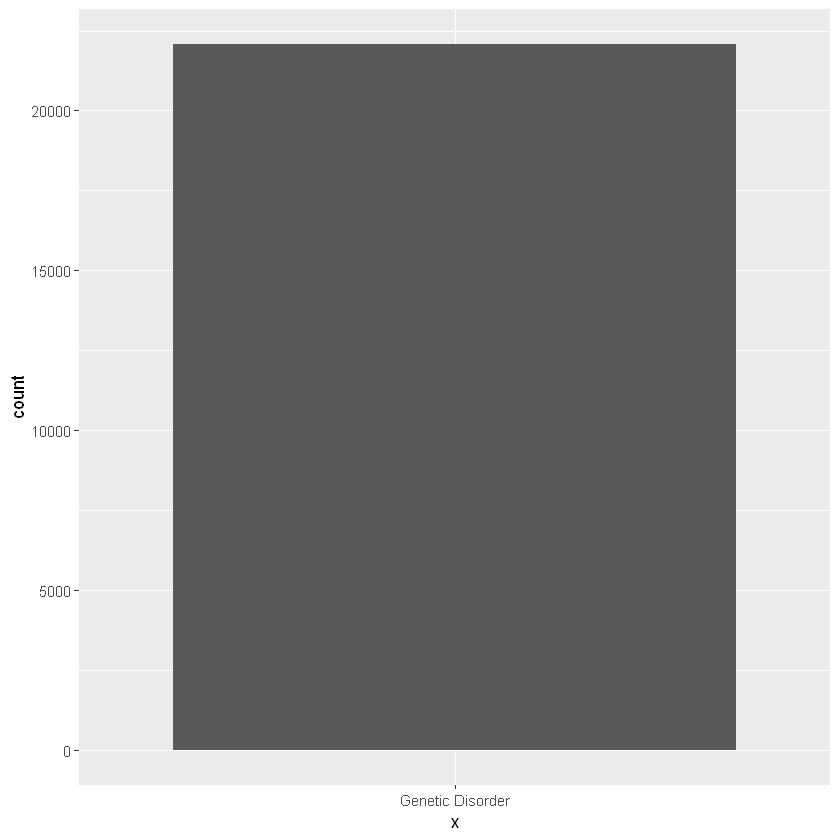

In [51]:
ggplot(data, aes(x = "Genetic Disorder")) +
  geom_bar()